# Preprocessing Project U1
### Noé Lozano Mendoza

In this project we are going to preprocess a cars dataframe, we re going to do an EDA and clean/transform it. First we are going to do an EDA, by searching issues in each variabel and in the whole dataframe. 




*   First we are going to import the necessary modules for manipulating the dataframe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data import

*   Second, we are going to extract the dataframe from its corresponding website.

In [ ]:
df = pd. read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


## Data exploration (and some necessary pre-transformation)

*   After reading the dataframe we can observe that it does not have any titles in their variables, fortunately, the website tells us which are the variables represented in the dataframe. So even though we haven't do the EDA, we can directly name the columns.



In [ ]:
df.columns = ['Buying price', 'Maint price', 'No. doors', 'Cap. of persons', 'Lug_boot', 'Safety', 'Class']
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good




*   Now, having the columns renamed, we can start our EDA. We are going to start checking some variables independently, we are going to check if there is any missing data or a misinterpration of pandas of typing the variable (string instead of int64 for example). 



In [ ]:
doors = df['No. doors'].value_counts()
doors

5more    432
3        432
4        432
2        431
Name: No. doors, dtype: int64

In [ ]:
CapacityPeop = df['Cap. of persons'].value_counts()
CapacityPeop

4       576
more    576
2       575
Name: Cap. of persons, dtype: int64

In [ ]:
Class = df.filter(['Class']).value_counts()
Class

Class
unacc    1209
acc       384
good       69
vgood      65
dtype: int64

In [ ]:
buyingPrice = df.filter(['Buying price']).value_counts()
buyingPrice

Buying price
med             432
low             432
high            432
vhigh           431
dtype: int64



*   After checking that there is no missing data in the variables, we are going to graph them for checking any anomaly or how it is distributed. We also found that all the columns are 'object' type and not int64 respectively. For example: No. doors or buying price.


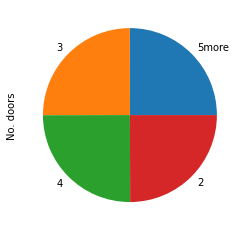

In [ ]:
doors.plot.pie()

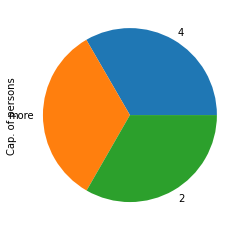

In [ ]:
CapacityPeop.plot.pie()

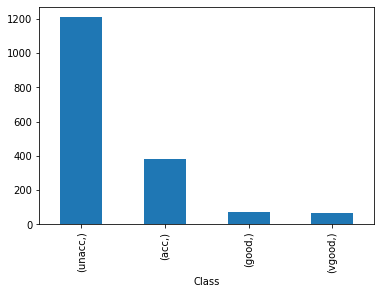

In [ ]:
Class.plot.bar()

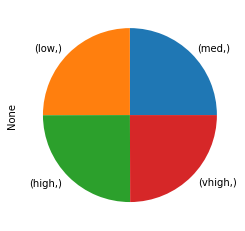

In [ ]:
buyingPrice.plot.pie()

## Data Cleaning

*   Considering that we assure that there are no anomalies on our variables, we can check the whole dataframe. For this we are going to analyze if there are missing values, wrong types, wrongly allocate data, etc.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Buying price     1727 non-null   object
 1   Maint price      1727 non-null   object
 2   No. doors        1727 non-null   object
 3   Cap. of persons  1727 non-null   object
 4   Lug_boot         1727 non-null   object
 5   Safety           1727 non-null   object
 6   Class            1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.isnull().sum()

Buying price       0
Maint price        0
No. doors          0
Cap. of persons    0
Lug_boot           0
Safety             0
Class              0
dtype: int64



*   We assured that there are no missing values in tha dataframe but we discovered that there are misstyped variables and a variable which is not clear of what it represents ('Class').



Considering that the data in the 'Class' variable is very ambiguous, and that in the website where the dataframe is from there is not information about that variable. I decided to erase it.

In [ ]:
df.drop('Class', axis=1, inplace=True)
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


## Data transformation

*   In the number of doors variable, I decided to change the '5more' category to 7, because, except exotic or rare automoviles, the majority of cars which have more than 5 doors (inlcuding the lugagge) have 7 doors. I even searched for the information and my thought was true.



In [ ]:
df['No. doors'] = df['No. doors'].replace(['5more'], 7)
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,7,more,med,med
1723,low,low,7,more,med,high
1724,low,low,7,more,big,low
1725,low,low,7,more,big,med




*   Now having all the data as int numbers, we can convert the whole variable to int64. 


In [ ]:
df['No. doors'] = pd.to_numeric(df['No. doors'])
df.dtypes

Buying price       object
Maint price        object
No. doors           int64
Cap. of persons    object
Lug_boot           object
Safety             object
dtype: object

In [ ]:
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,7,more,med,med
1723,low,low,7,more,med,high
1724,low,low,7,more,big,low
1725,low,low,7,more,big,med




*   At this point, the dataframe is tidy. However I decided to make the prices variables to int in a scale of 1-4, 4 being the highest value. This is because is price is not entirely subjective as it may be the space of the luggage or the capacity of people.


In [ ]:
df['Buying price'] = df['Buying price'].replace(['vhigh'], 4)
df['Buying price'] = df['Buying price'].replace(['high'], 3)
df['Buying price'] = df['Buying price'].replace(['med'], 2)
df['Buying price'] = df['Buying price'].replace(['low'], 1)
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety
0,4,vhigh,2,2,small,med
1,4,vhigh,2,2,small,high
2,4,vhigh,2,2,med,low
3,4,vhigh,2,2,med,med
4,4,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,1,low,7,more,med,med
1723,1,low,7,more,med,high
1724,1,low,7,more,big,low
1725,1,low,7,more,big,med


In [ ]:
df['Maint price'] = df['Maint price'].replace(['vhigh'], 4)
df['Maint price'] = df['Maint price'].replace(['high'], 3)
df['Maint price'] = df['Maint price'].replace(['med'], 2)
df['Maint price'] = df['Maint price'].replace(['low'], 1)
df

,Buying price,Maint price,No. doors,Cap. of persons,Lug_boot,Safety
0,4,4,2,2,small,med
1,4,4,2,2,small,high
2,4,4,2,2,med,low
3,4,4,2,2,med,med
4,4,4,2,2,med,high
...,...,...,...,...,...,...
1722,1,1,7,more,med,med
1723,1,1,7,more,med,high
1724,1,1,7,more,big,low
1725,1,1,7,more,big,med


# Perfect now we have finished our dataframe preprocessing. Our dataframe is finally tidy.

### We can conclude that the process made in this dataframe was about understanding and naming the variables correctly, being sure there are no missing variables or data anomalies, changing the type of some variables for practicity and for actually having a multityped dataframe [(which was mentioned in the link of the dataset)](https://archive-beta.ics.uci.edu/ml/datasets/car+evaluation), and finally changing some obligatory variables to int type because we can measure them with a scale (Which it was not necessary but it could be useful).

[(All the information about the functions used, can be founf in the panda's librar )](https://pandas.pydata.org/docs/user_guide/index.html)